<a href="https://colab.research.google.com/github/nijatmaharramov/InternIntelligence_ML_Projects/blob/main/Task_2_Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/bank-transaction-dataset-for-fraud-detection")

print("Path to dataset files:", path)

100%|██████████| 102k/102k [00:00<00:00, 29.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4


In [3]:
df = pd.read_csv(path + '/bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# Understanding the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [6]:
df.nunique()

,0
TransactionID,2512
AccountID,495
TransactionAmount,2455
TransactionDate,2512
TransactionType,2
Location,43
DeviceID,681
IP Address,592
MerchantID,100
Channel,3


# EDA

array([[<Axes: title={'center': 'TransactionAmount'}>,
        <Axes: title={'center': 'CustomerAge'}>],
       [<Axes: title={'center': 'TransactionDuration'}>,
        <Axes: title={'center': 'LoginAttempts'}>],
       [<Axes: title={'center': 'AccountBalance'}>, <Axes: >]],
      dtype=object)

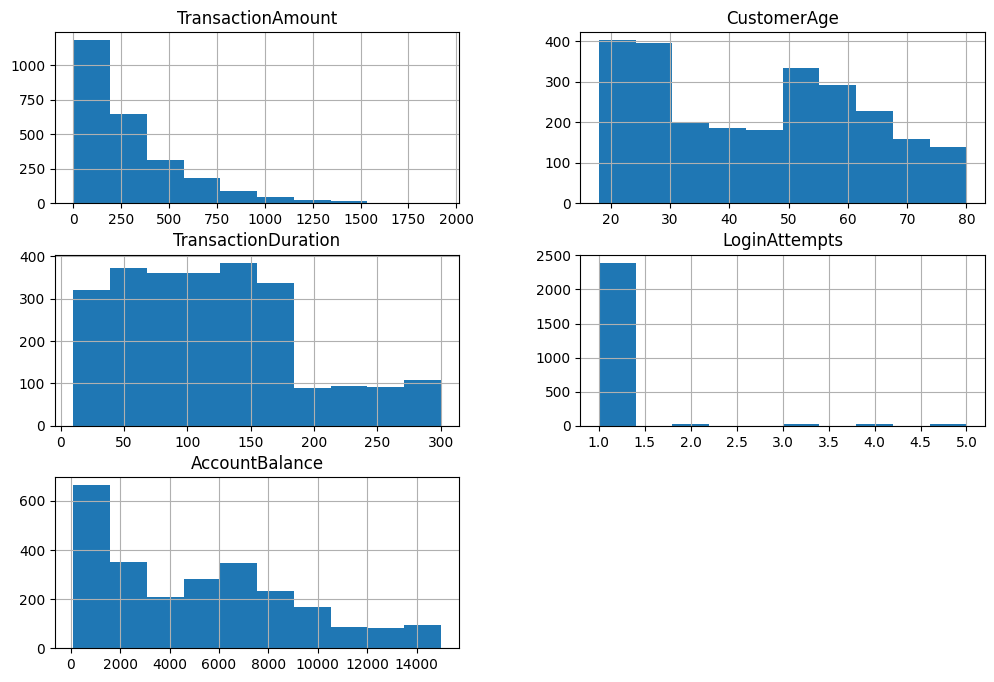

In [7]:
df.hist(figsize=(12,8))

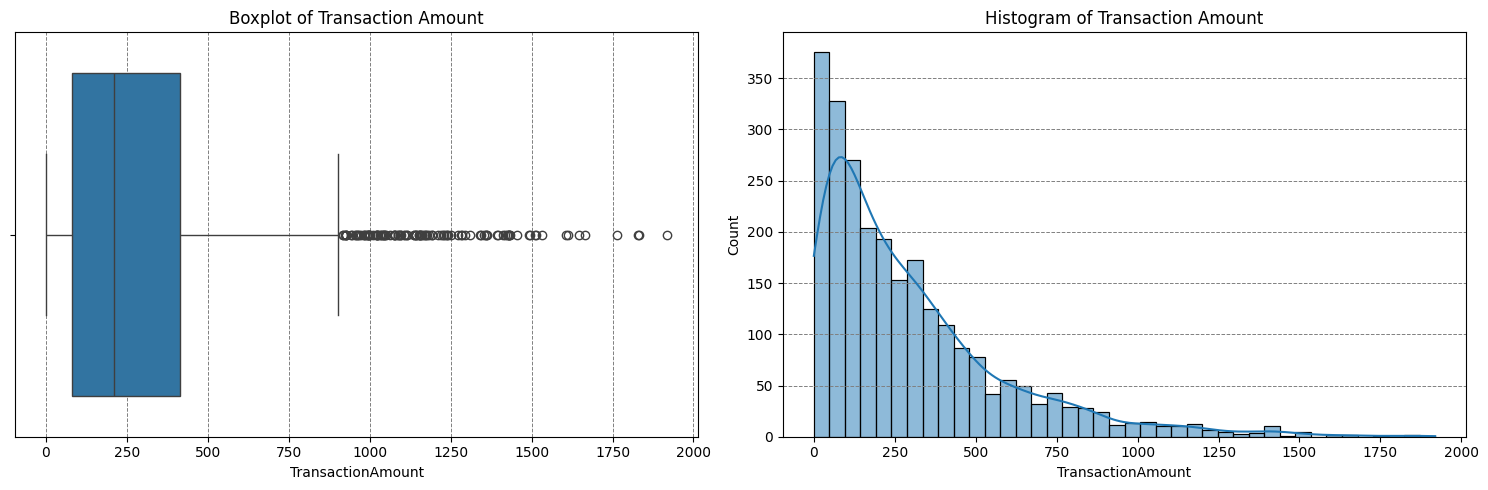

In [8]:
# The boxplot and histogram show that there are many small transactions and a few very large transaction. That's why they show right-skewed distribution.

import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df["TransactionAmount"], ax=axes[0])
axes[0].set_title("Boxplot of Transaction Amount")
axes[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)


sns.histplot(df["TransactionAmount"], ax=axes[1], kde=True)
axes[1].set_title("Histogram of Transaction Amount")
axes[1].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)


plt.tight_layout()
plt.show()


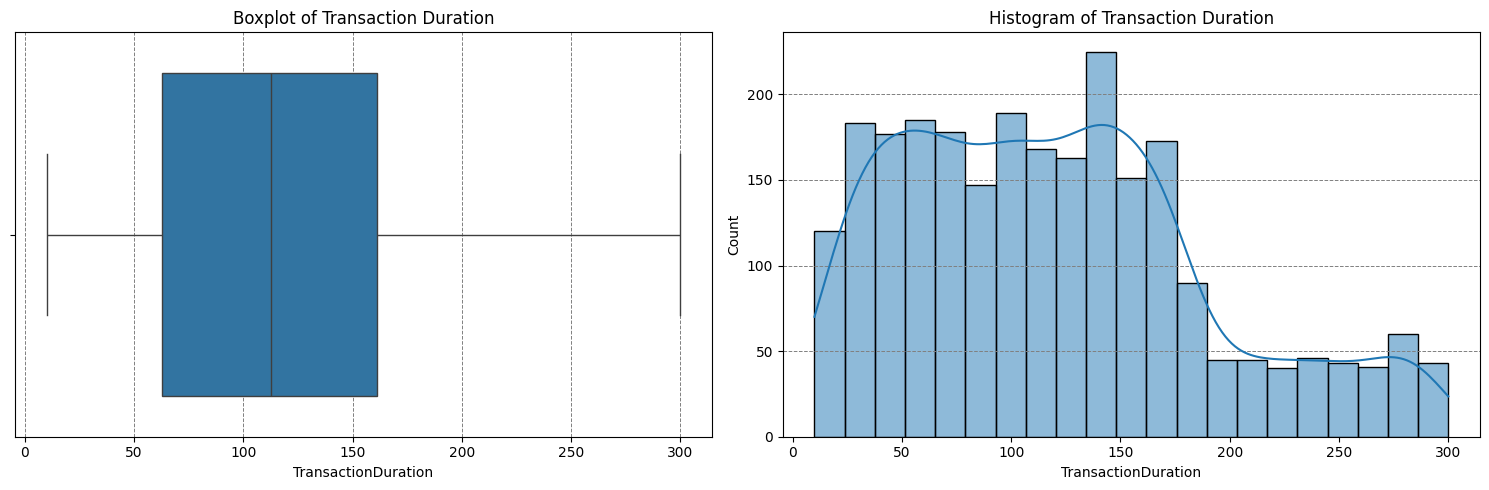

In [9]:
# The boxplot and histogram show roughly balanced distribution

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df["TransactionDuration"], ax=axes[0])
axes[0].set_title("Boxplot of Transaction Duration")
axes[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)


sns.histplot(df["TransactionDuration"], ax=axes[1], kde=True)
axes[1].set_title("Histogram of Transaction Duration")
axes[1].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)


plt.tight_layout()
plt.show()

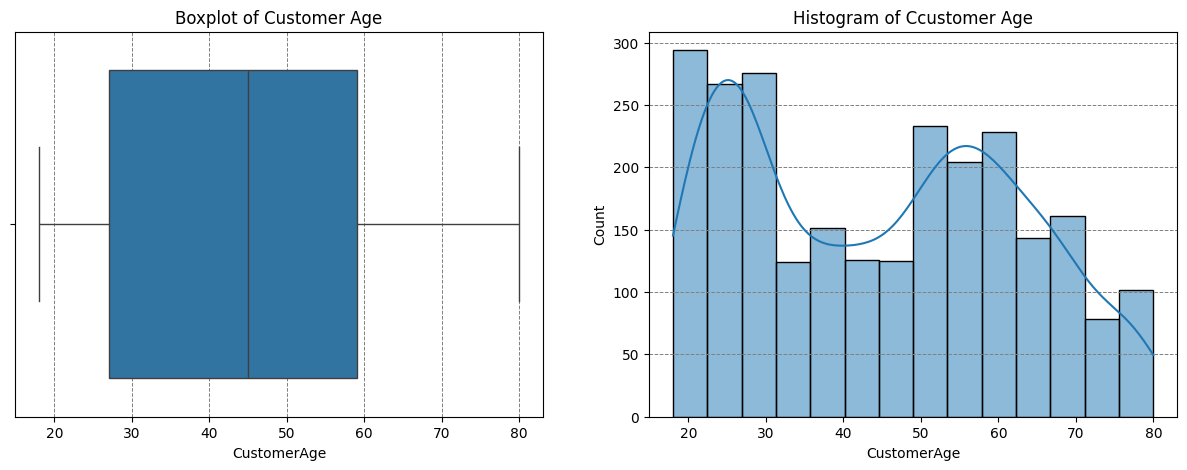

In [10]:
 # The boxplot and histogram for this column shows roughy balanced distribution too with a slight peak around the middle ages.
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['CustomerAge'], ax = axes[0])
axes[0].set_title('Boxplot of Customer Age')
axes[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)


sns.histplot(df['CustomerAge'], ax = axes[1], kde=True)
axes[1].set_title('Histogram of Ccustomer Age')
axes[1].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)


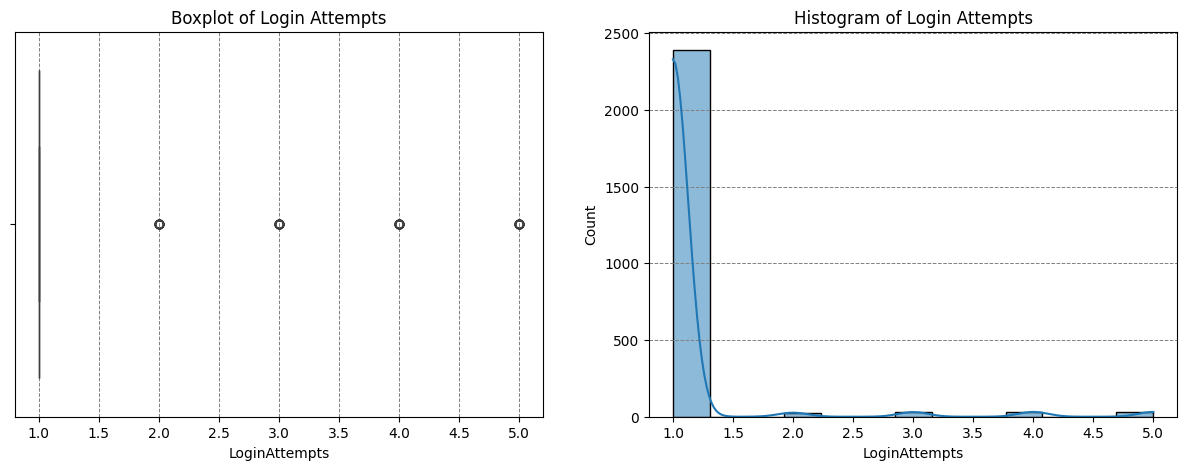

In [11]:
# The boxplot and histogram clearly show that distribution heavily skewed to 1. It means most people have logged in only at their first attempts. This information can help us for anomaly detection algorithm.

fig, axes = plt.subplots(1, 2, figsize=(15, 5))


sns.boxplot(x=df['LoginAttempts'], ax=axes[0])
axes[0].set_title('Boxplot of Login Attempts')
axes[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)


sns.histplot(df['LoginAttempts'], ax=axes[1], kde=True)
axes[1].set_title('Histogram of Login Attempts')
axes[1].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)





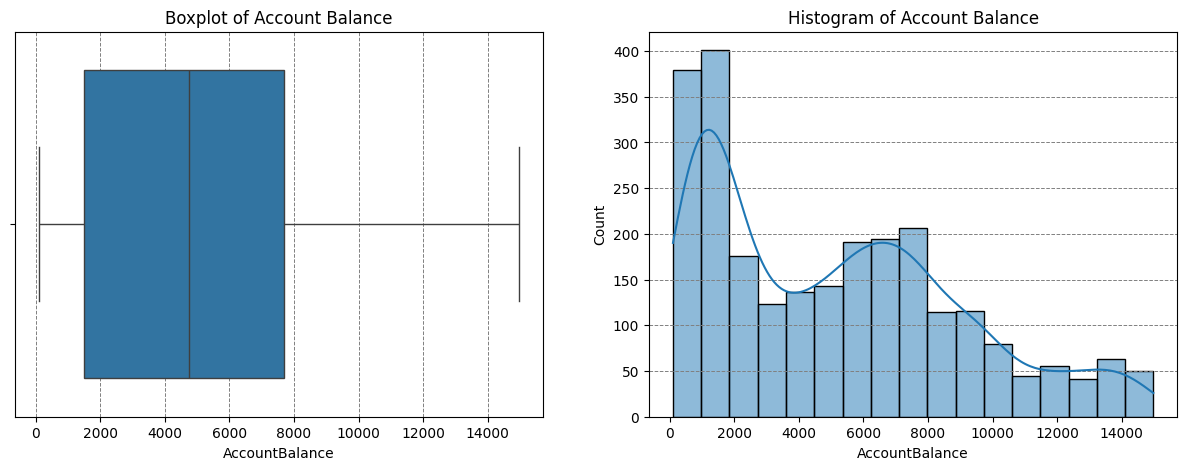

In [12]:
# The boxplot and histogram show right-skewed distribution. It means that most accounts have lower balance, while the rest(smaller proportion) have higher balance in comparison. It can help us for further investigation on anomaly detection algorithm.

fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(x=df['AccountBalance'], ax=axes[0])
axes[0].set_title('Boxplot of Account Balance')
axes[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

sns.histplot(df['AccountBalance'], ax=axes[1], kde=True)
axes[1].set_title('Histogram of Account Balance')
axes[1].grid(axis='y', color='gray', linestyle='--', linewidth = 0.7)

# Anomaly Detection

KMeans

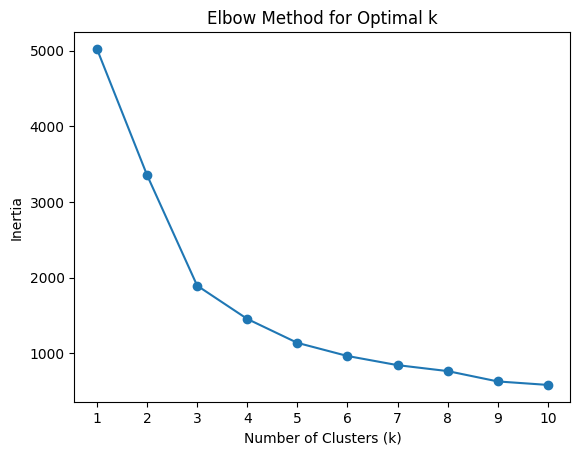

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['TransactionAmount', 'TransactionDuration']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.xticks(range(1, 11))
plt.show()

# we see in result of elbow method that the best number for the count of the clusters is 3.

In [14]:
kmeans.cluster_centers_

array([[-0.7139987 , -0.307549  ],
       [-0.63988646,  0.59692666],
       [ 0.549253  ,  0.5117123 ],
       [-0.3474707 ,  1.96508112],
       [ 3.3188956 , -0.18039089],
       [ 0.2500988 , -1.06015748],
       [ 1.84561791,  1.41639641],
       [ 0.10214613, -0.19522675],
       [-0.66714658, -1.12318199],
       [ 1.50336214, -0.60403303]])

Number of anomalies detected: 126


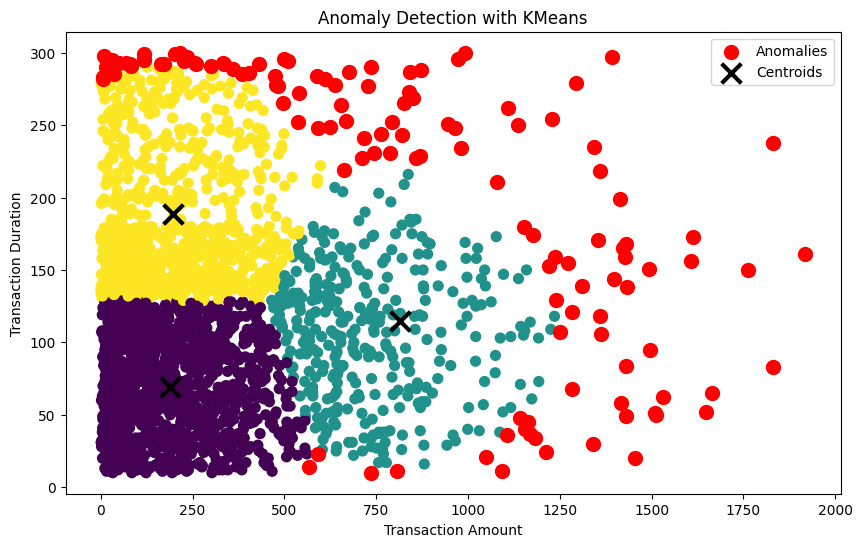

In [15]:
kmeans = KMeans(n_clusters= 3, random_state=42)
kmeans.fit(X_scaled)

df['cluster'] = kmeans.labels_
df['distance'] = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans.labels_], axis=1)

threshold = df['distance'].quantile(0.95)
anomalies = df[df['distance'] > threshold]

print(f"Number of anomalies detected: {len(anomalies)}")

plt.figure(figsize=(10, 6))
plt.scatter(df['TransactionAmount'], df['TransactionDuration'], c=df['cluster'], cmap='viridis', s=50)
plt.scatter(anomalies['TransactionAmount'], anomalies['TransactionDuration'], c='red', label='Anomalies', s=100)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidth=3, label='Centroids', color = 'black')

plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Duration')
plt.title('Anomaly Detection with KMeans')

plt.legend()
plt.show()


* We see that in this dataset we have 126 potential fraud (anomaly). And this is only the result of KMeans with only 2 features of our dataframe. For further investigation, we can use IsolationForest and DBSCAN algorithms to compare the results and decide the best one to use for business insights. Other than that we can also look at other features correlation and find out potential frauds.